In [263]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# pip install scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

In [264]:
 # read the data
df = pd.read_csv("commodity 2000-2022.csv")

In [266]:
# Replace string values into integers
# In integer values:
# Gold = 0, Palladium = 1, Nickel = 2, Brent Oil = 3, Natural Gas = 4 and US Wheat = 5
df = df.replace({'Gold': 0, 'Palladium': 1, 'Nickel': 2, 'Brent Oil': 3, 'Natural Gas': 4, 'US Wheat': 5})

C:\Users\vilil\AppData\Local\Temp\ipykernel_3536\363166622.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({'Gold': 0, 'Palladium': 1, 'Nickel': 2, 'Brent Oil': 3, 'Natural Gas': 4, 'US Wheat': 5})


In [267]:
# convert the date column into a datetime object
df['Date'] = pd.to_datetime(df['Date'])

# extract the day, month, and year components
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

# show the modified data frame
print(df)

       Symbol       Date     Open     High      Low    Close  Volume  Day  \
0           0 2000-01-04   281.00   281.00   281.00   282.70       4    4   
1           0 2000-01-05   283.20   283.20   283.20   281.10      16    5   
2           0 2000-01-06   281.40   281.40   281.40   281.40       0    6   
3           0 2000-01-07   281.90   281.90   281.90   281.90       0    7   
4           0 2000-01-10   281.70   281.70   281.70   281.70       0   10   
...       ...        ...      ...      ...      ...      ...     ...  ...   
29930       5 2022-04-04   989.50  1014.50   984.75  1010.25       0    4   
29931       5 2022-04-05  1020.50  1074.00  1020.00  1045.25       0    5   
29932       5 2022-04-06  1049.40  1056.40  1024.25  1041.12       0    6   
29933       5 2022-04-07  1040.25  1044.50  1017.75  1020.00       0    7   
29934       5 2022-04-08  1020.00  1054.25  1017.00  1051.50       0    8   

       Month  Year  
0          1  2000  
1          1  2000  
2          1

In [268]:
# drop unneccesary "Date" because now on we'll use it in day, month and year sections
df = df.drop('Date', axis=1)

print(df)

       Symbol     Open     High      Low    Close  Volume  Day  Month  Year
0           0   281.00   281.00   281.00   282.70       4    4      1  2000
1           0   283.20   283.20   283.20   281.10      16    5      1  2000
2           0   281.40   281.40   281.40   281.40       0    6      1  2000
3           0   281.90   281.90   281.90   281.90       0    7      1  2000
4           0   281.70   281.70   281.70   281.70       0   10      1  2000
...       ...      ...      ...      ...      ...     ...  ...    ...   ...
29930       5   989.50  1014.50   984.75  1010.25       0    4      4  2022
29931       5  1020.50  1074.00  1020.00  1045.25       0    5      4  2022
29932       5  1049.40  1056.40  1024.25  1041.12       0    6      4  2022
29933       5  1040.25  1044.50  1017.75  1020.00       0    7      4  2022
29934       5  1020.00  1054.25  1017.00  1051.50       0    8      4  2022

[29935 rows x 9 columns]


In [269]:
# if you  have more than one independent variables, list them all here
# leave out the target variable! (dependent variable)
# this always changes based on your dataset
X = df[['Symbol', 'Year', 'Month', 'Day', 'Open', 'High', 'Low', 'Volume']]

# have only the target variable here (dependent variable)
y = df['Close']

# you can also use this trick to make X and y
# basically: X equals to all data minus the target variable
# y is just the target variable
# X = df.drop('target variable', axis=1)
# y = df['target variable']

In [271]:
 
# displaying the datatypes
display(df.dtypes)
 
# converting all columns from float to int
df = df.astype({"Symbol": 'int', "Open": 'int', "High": 'int',"Low": 'int',"Volume": 'int',"Close": 'int'})
# 'Open', 'High', 'Low', 'Volume'
 
# displaying the datatypes
display(df.dtypes)

Symbol      int64
Open      float64
High      float64
Low       float64
Close     float64
Volume      int64
Day         int32
Month       int32
Year        int32
dtype: object

Symbol    int32
Open      int32
High      int32
Low       int32
Close     int32
Volume    int32
Day       int32
Month     int32
Year      int32
dtype: object

In [272]:
df

,Symbol,Open,High,Low,Close,Volume,Day,Month,Year
0,0,281,281,281,282,4,4,1,2000
1,0,283,283,283,281,16,5,1,2000
2,0,281,281,281,281,0,6,1,2000
3,0,281,281,281,281,0,7,1,2000
4,0,281,281,281,281,0,10,1,2000
...,...,...,...,...,...,...,...,...,...
29930,5,989,1014,984,1010,0,4,4,2022
29931,5,1020,1074,1020,1045,0,5,4,2022
29932,5,1049,1056,1024,1041,0,6,4,2022
29933,5,1040,1044,1017,1020,0,7,4,2022


In [273]:
df.describe()

,Symbol,Open,High,Low,Close,Volume,Day,Month,Year
count,29935.000000,29935.000000,29935.000000,29935.00000,29935.000000,2.993500e+04,29935.000000,29935.000000,29935.000000
mean,2.653249,2199.515484,2217.091699,2182.80304,2200.565926,5.272722e+04,15.677568,6.491933,2011.788141
std,1.777200,5054.283033,5088.481067,5024.55600,5055.102696,8.280148e+04,8.785675,3.454047,6.230137
min,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000e+00,1.000000,1.000000,2000.000000
25%,1.000000,48.000000,48.000000,47.00000,48.000000,1.000000e+00,8.000000,3.000000,2007.000000
50%,3.000000,431.000000,435.000000,428.00000,431.000000,1.157100e+04,16.000000,7.000000,2012.000000
75%,4.000000,1164.500000,1173.000000,1157.50000,1168.000000,7.218800e+04,23.000000,10.000000,2017.000000
max,5.000000,81066.000000,86791.000000,81031.00000,81051.000000,1.083978e+06,31.000000,12.000000,2022.000000


In [274]:
 # pip install statsmodels
from statsmodels.stats.outliers_influence import variance_inflation_factor 

# VIF dataframe 
# VIF = Variance Inflation Factor
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
  
# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                          for i in range(len(X.columns))] 
  

# variables with high VIF-value 
# can mean multlicollinearity (variables providing same linear
# relationships in the data, confusing the logistic regression)
# however, this information can be misleading too so remember to be careful before deleting any data!
vif_data

# in this dataset, everything is in order (all values are small)

,feature,VIF
0,Symbol,3.595145
1,Year,10.773875
2,Month,4.532635
3,Day,4.210858
4,Open,16921.923931
5,High,7242.598614
6,Low,8775.129130
7,Volume,1.612467


In [275]:
# Drop unneccesary columns that might instercept
# linear regression model in the future
X = df.drop('Day',  axis=1)
X = df.drop('Month', axis=1)
X = df.drop('Year', axis=1)

In [276]:
 # a common trick in X/y -split
# X = everything else in the DataFrame minus the target variable
# y = only the target variable
X = df.drop('Symbol', axis=1)
y = df['Symbol']

In [277]:
# create train and test sets of your dataset
# random_state is optional, you can lock this down in order to 
# to get same results always
# this examples reserves 30% for test data, 70% for training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [278]:
# initialize the scaler and process X-values
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [280]:
# Change X_train variable from float to integer
X_train.astype('int64')

array([[ 0,  0,  0, ...,  0,  0,  0],
       [ 2,  2,  2, ...,  1, -1,  1],
       [ 0,  0,  0, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ..., -1,  0,  1],
       [ 0,  0,  0, ...,  0,  0,  1],
       [ 0,  0,  0, ...,  0,  1, -1]], dtype=int64)

In [281]:
# Change y_train variable from float to integer
y_train.astype('int64')

25734    5
11934    2
26849    5
2351     0
1215     0
        ..
5695     0
8006     1
17745    3
17931    3
13151    3
Name: Symbol, Length: 20954, dtype: int64

In [282]:
# fit the model
# for multinomial we have to use multinomial for multi_class -parameter
# and also use a solver that supports multinomial logistic regression
# these solvers are newton-cg, sag, saga (also the default lbfgs, but it 
# usually doesn't work that well with multinomial)
logmodel = LogisticRegression(multi_class="multinomial", solver="newton-cg")
logmodel.fit(X_train, y_train)

LogisticRegression(multi_class='multinomial', solver='newton-cg')

In [283]:
# create test predictions
predictions = logmodel.predict(X_test)

# our labels for the species in iris dataset
labels = 'Gold', 'Palladium', 'Nickel', 'Brent Oil', 'Natural Gas', 'US Wheat'

# use labels-list to have better classification anmes
print(classification_report(y_test, predictions, target_names=labels))
acc = accuracy_score(y_test, predictions)
print("\nModel overall accuracy: {:.2f}%".format(acc * 100))

              precision    recall  f1-score   support

        Gold       0.70      0.75      0.72      1687
   Palladium       0.47      0.42      0.44      1109
      Nickel       1.00      1.00      1.00      1004
   Brent Oil       0.83      0.68      0.75      1749
 Natural Gas       0.72      0.86      0.79      1696
    US Wheat       0.77      0.76      0.76      1736

    accuracy                           0.75      8981
   macro avg       0.75      0.74      0.74      8981
weighted avg       0.75      0.75      0.74      8981


Model overall accuracy: 74.58%


In [284]:
# Predictions variable for future applications
predictions = logmodel.predict(X_test)

In [285]:
# print the classification report based on true values and predictions
print(classification_report(y_test, predictions))

# get overall accuracy of the model and print it
acc = accuracy_score(y_test, predictions)
print("\nModel overall accuracy: {:.2f}%".format(acc * 100))

              precision    recall  f1-score   support

           0       0.70      0.75      0.72      1687
           1       0.47      0.42      0.44      1109
           2       1.00      1.00      1.00      1004
           3       0.83      0.68      0.75      1749
           4       0.72      0.86      0.79      1696
           5       0.77      0.76      0.76      1736

    accuracy                           0.75      8981
   macro avg       0.75      0.74      0.74      8981
weighted avg       0.75      0.75      0.74      8981


Model overall accuracy: 74.58%


[[1257  398    0    0    0   32]
 [ 269  468    0    0    0  372]
 [   0    0 1004    0    0    0]
 [   0    0    0 1191  558    0]
 [   0    0    0  235 1461    0]
 [ 275  133    0   11    0 1317]]




<Axes: >

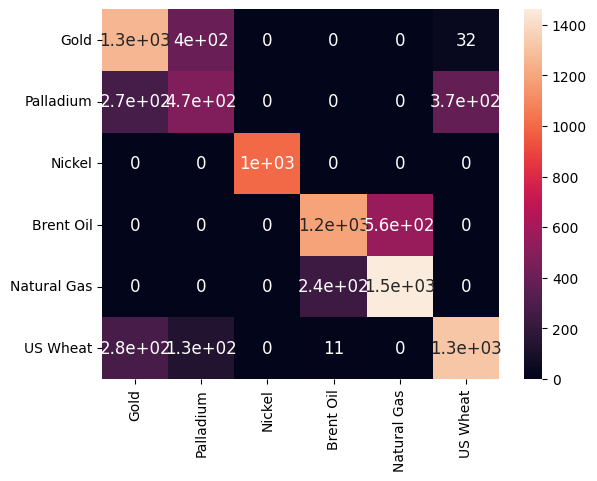

In [286]:
# Basic confusion matrix
print(confusion_matrix(y_test, predictions))
print("\n")

# use seaborn to make a nicer confusion matrix
cm_array = confusion_matrix(y_test, predictions)
cm_array_df = pd.DataFrame(cm_array, index=labels, columns=labels)
sns.heatmap(cm_array_df, annot=True, annot_kws={"size": 12}) 

In [287]:
# Calculate how accurate the prediction is
roc_auc_score(y, logmodel.predict_proba(X), multi_class='ovr')

c:\Users\vilil\Desktop\Machine_Learning_2024\Project2_LogisticRegeression\.venv\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


0.6050944406530818

In [288]:
df.describe()

,Symbol,Open,High,Low,Close,Volume,Day,Month,Year
count,29935.000000,29935.000000,29935.000000,29935.00000,29935.000000,2.993500e+04,29935.000000,29935.000000,29935.000000
mean,2.653249,2199.515484,2217.091699,2182.80304,2200.565926,5.272722e+04,15.677568,6.491933,2011.788141
std,1.777200,5054.283033,5088.481067,5024.55600,5055.102696,8.280148e+04,8.785675,3.454047,6.230137
min,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000e+00,1.000000,1.000000,2000.000000
25%,1.000000,48.000000,48.000000,47.00000,48.000000,1.000000e+00,8.000000,3.000000,2007.000000
50%,3.000000,431.000000,435.000000,428.00000,431.000000,1.157100e+04,16.000000,7.000000,2012.000000
75%,4.000000,1164.500000,1173.000000,1157.50000,1168.000000,7.218800e+04,23.000000,10.000000,2017.000000
max,5.000000,81066.000000,86791.000000,81031.00000,81051.000000,1.083978e+06,31.000000,12.000000,2022.000000


In [289]:
df

,Symbol,Open,High,Low,Close,Volume,Day,Month,Year
0,0,281,281,281,282,4,4,1,2000
1,0,283,283,283,281,16,5,1,2000
2,0,281,281,281,281,0,6,1,2000
3,0,281,281,281,281,0,7,1,2000
4,0,281,281,281,281,0,10,1,2000
...,...,...,...,...,...,...,...,...,...
29930,5,989,1014,984,1010,0,4,4,2022
29931,5,1020,1074,1020,1045,0,5,4,2022
29932,5,1049,1056,1024,1041,0,6,4,2022
29933,5,1040,1044,1017,1020,0,7,4,2022


In [290]:
tester_row = {
    'Open': 700,
    'High': 600,
    'Low': 300,
    'Close': 500,
    'Volume': 15,
    'Day': 15,
    'Month': 10,
    'Year': 2001,
}

# create a pandas DataFrame and scale the values
tester_row = pd.DataFrame([tester_row])
tester_row = sc.transform(tester_row)

print("All probabilities by category:")
print(logmodel.predict_proba(tester_row))
print()

# change these based on your original data
labels = ["No", "Yes"]

print("Was in question comodity sold with tested value (Yes/No):")
result = labels[logmodel.predict(tester_row)[0]]
print(result)
print("-------------------")

All probabilities by category:
[[7.26966678e-01 4.49255735e-02 3.31305451e-04 7.52773629e-03
  1.84229352e-04 2.20064478e-01]]

Did this customer buy the service (Yes/No):
No
-------------------
